# Primera Entrega - Proyecto Final
### Dataset - Aplicaciones de Google Play Store
Alumno: Gaston Pascua

### Hipotesis / Preguntas de interés:
- Predecir el éxito de una aplicacion.

## Librerias

In [17]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Dataset

In [18]:
df = pd.read_csv("data/apps.csv")
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

## Preparacion y limpieza 

In [20]:
print("Registros duplicados: ",df.duplicated().sum())

Registros duplicados:  0


### Reducción Dimensionalidad

#### Eliminacion variables irrelevantes y con datos faltantes
--> Privacy Policy e installs poseen muchos datos faltantes

--> Variables irrelevantes: App Name,App Id,Minimum Installs, Developer Website, Developer Id, Developer Email, Scraped Time,Currency

In [21]:
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [22]:
eliminar = ['App Name','App Id','Minimum Installs','Installs','Developer Website', 'Developer Id', 'Developer Email', 'Scraped Time','Currency','Privacy Policy']
df.drop(eliminar, axis='columns', inplace=True)
assert df.columns.all() not in eliminar
df.dropna(inplace=True)

In [23]:
with pd.option_context('float_format', '{:f}'.format):
    print(df.describe())
#Observamos los datos con valores correctos
#La columna precio es posible que se elimine, ademas que el dataset posee pocas aplicaciones pagas.

              Rating     Rating Count   Maximum Installs          Price
count 2235331.000000   2235331.000000     2235331.000000 2235331.000000
mean        2.206450      2759.848774      308112.878088       0.104767
std         2.108360    198757.209433    22088539.515041       2.660892
min         0.000000         0.000000           0.000000       0.000000
25%         0.000000         0.000000          86.000000       0.000000
50%         3.000000         6.000000         706.000000       0.000000
75%         4.300000        42.000000        7427.000000       0.000000
max         5.000000 138557570.000000 12057627016.000000     400.000000


### Transformacion de la variable "Size" a tipo float

In [24]:
#Funcion convertir valor a float
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x  
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

df['Size'] = df['Size'].str.replace(',','')
df['Size'] = df['Size'].apply(value_to_float)

### Transformación Categórica

In [25]:
#Content Rating
lbl_content_rating=LabelEncoder()
df['Content Rating']=lbl_content_rating.fit_transform(df['Content Rating'])

#Minimum Android
def min_android(data):
    p=data.split()
    if data=='Varies with device':
        return 4.0
    else:
        return float(p[0][:3])
df['Minimum Android']=df['Minimum Android'].apply(min_android)

#Category
lbl_category=LabelEncoder()
df['Category']=lbl_category.fit_transform(df['Category'])

#Elimino Released y Last update
df.drop(['Released','Last Updated'],inplace=True,axis=1)

#Variables booleanas
df['Free']=pd.Categorical(df['Free'],ordered=True,categories=[False,True]).codes
df['Ad Supported']=pd.Categorical(df['Ad Supported'],ordered=True,categories=[False,True]).codes
df['In App Purchases']=pd.Categorical(df['In App Purchases'],ordered=True,categories=[False,True]).codes
df['Editors Choice']=pd.Categorical(df['Editors Choice'],ordered=True,categories=[False,True]).codes

## Modelado - Regresión Lineal

In [26]:
x= df.drop('Rating',axis=1)
y= df['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1) 

In [27]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

pred = model_1.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)

print('MAE: ', mae)
print('RMSE: ', np.sqrt(mse))
print('R2: ', r2)

MAE:  1.9415331428885065
RMSE:  2.0522533107534375
R2:  0.05220852206709736


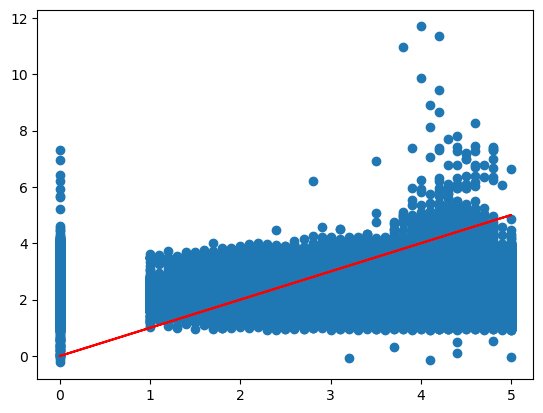

In [28]:
plt.scatter(y_train,model_1.predict(x_train))
plt.plot(y_train,y_train,'r')

## Modelado - Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model_2=DecisionTreeRegressor(max_depth=9)
model_2.fit(x_train,y_train)

pred = model_2.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)

print('MAE: ', mae)
print('RMSE: ', np.sqrt(mse))
print('R2: ', r2)

MAE:  0.24778867964223966
RMSE:  0.45318690886069324
R2:  0.9537825924178847


## Modelado - Random Forest Regressor

In [31]:
from sklearn.ensemble import  RandomForestRegressor

In [32]:
model_3=RandomForestRegressor(max_depth=9)
model_3.fit(x_train,y_train)

pred = model_3.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)

print('MAE: ', mae)
print('RMSE: ', np.sqrt(mse))
print('R2: ', r2)

MAE:  0.24663447615151077
RMSE:  0.4511742740024192
R2:  0.954192190366599


### Conclusiones
Considero que tanto los modelos Random Forest como Decision Tree se adaptan mejor en la predicción.

Por ejemplo con el modelo de regresion lineal se observa claramante un Underfitting. 
Una posible solucion seria tratar los outliers, ya que en variables como precio e instalaciones hay grandes distancias en los valores.